In [1]:
import matplotlib.pyplot as plt
import cobra
from cobra.io import validate_sbml_model
import importlib
import utils.Model_correction as mc
import utils.model_maj as mj
import utils.viz_utils as vu
#import cplex
import plotly.express as px
from cobra.core.model import Model

pyparsing import

INFO: No xlwt module available, Excel spreadsheet creation disabled
CBGLPK based on swiglpk: not all methods implimented yet! 5.0

*****
Using CPLEX
*****

doFBAMinSum not available with GLPK

INFO: No xlrd module available, Excel spreadsheet reading disabled


***********************************************************************
* Welcome to CBMPy (0.8.4) - PySCeS Constraint Based Modelling        *
*                http://cbmpy.sourceforge.net                         *
* Copyright(C) Brett G. Olivier 2014 - 2020                           *
* Systems Biology Lab, Vrije Universiteit Amsterdam                   *
* Amsterdam, The Netherlands                                          *
* CBMPy is developed as part of the BeBasic MetaToolKit Project       *
* Distributed under the GNU GPL v 3.0 licence, see                    *
* LICENCE (supplied with this release) for details                    *
***********************************************************************


In [1]:
import cnapy

In [2]:
HepG2, errors = validate_sbml_model("../models_storage/HepG2_medium.xml")

In [3]:
healthy, errors = validate_sbml_model("../models_storage/iHep_updated_v011.xml")

### Original biomass reaction :

In [3]:
print("REACTANTS: \n")
for metabolite_r in HepG2.reactions.get_by_id("biomass_components").reactants:
    print(f"ID : {metabolite_r.id} -- NAME : {metabolite_r.name}")

print("PRODUCTS: \n")
for metabolite_p in HepG2.reactions.get_by_id("biomass_components").products:
    print(f"ID : {metabolite_p.id} -- NAME : {metabolite_p.name}")

REACTANTS: 

ID : m01307c -- NAME : alanine
ID : m01365c -- NAME : arginine
ID : m01369c -- NAME : asparagine
ID : m01370c -- NAME : aspartate
ID : m01450c -- NAME : cholesterol
ID : m01451r -- NAME : cholesterol-ester pool
ID : m01589c -- NAME : CL pool
ID : m01628c -- NAME : cysteine
ID : m01721n -- NAME : DNA
ID : m01722n -- NAME : DNA-5-methylcytosine
ID : m01974c -- NAME : glutamate
ID : m01975c -- NAME : glutamine
ID : m01986c -- NAME : glycine
ID : m02125c -- NAME : histidine
ID : m02184c -- NAME : isoleucine
ID : m02360c -- NAME : leucine
ID : m02392c -- NAME : lipid droplet
ID : m02426c -- NAME : lysine
ID : m02471c -- NAME : methionine
ID : m02724c -- NAME : phenylalanine
ID : m02733c -- NAME : phosphatidate-LD-TAG pool
ID : m02750c -- NAME : PI pool
ID : m02770c -- NAME : proline
ID : m02847c -- NAME : RNA
ID : m02896c -- NAME : serine
ID : m02908c -- NAME : SM pool
ID : m02993c -- NAME : threonine
ID : m03089c -- NAME : tryptophan
ID : m03101c -- NAME : tyrosine
ID : m03135

### Adding NTPs to the biomass reaction reactants :

In [9]:
for metabolite in healthy.metabolites:
    id = metabolite.id
    if "TP" in metabolite.name:
        print(metabolite.id, metabolite.name)

m00111c (6Z,9Z,12Z,15Z,18Z)-TPA
m00111l (6Z,9Z,12Z,15Z,18Z)-TPA
m00111r (6Z,9Z,12Z,15Z,18Z)-TPA
m00111s (6Z,9Z,12Z,15Z,18Z)-TPA
m00135c (9Z,12Z,15Z,18Z,21Z)-TPA
m00135l (9Z,12Z,15Z,18Z,21Z)-TPA
m00135r (9Z,12Z,15Z,18Z,21Z)-TPA
m00135s (9Z,12Z,15Z,18Z,21Z)-TPA
m01371c ATP
m01371g ATP
m01371l ATP
m01371m ATP
m01371n ATP
m01371p ATP
m01371r ATP
m01371s ATP
m01623c CTP
m01623m CTP
m01623n CTP
m01623s CTP
m01642c dATP
m01642m dATP
m01642n dATP
m01645c dCTP
m01645m dCTP
m01645n dCTP
m01688c dGTP
m01688m dGTP
m01688n dGTP
m01714c dITP
m01714m dITP
m01714n dITP
m01714s dITP
m01753c dTTP
m01753m dTTP
m01753n dTTP
m01756c dUTP
m01756m dUTP
m01756n dUTP
m02034c GTP
m02034m GTP
m02034n GTP
m02034s GTP
m02193c ITP
m02193m ITP
m02193n ITP
m02193s ITP
m03130c UTP
m03130m UTP
m03130n UTP
m03130s UTP
m03154c XTP
m03154s XTP
m02193x ITP
m01714x dITP
m02034x GTP
m03130x UTP
m03154x XTP


In [4]:
for metab_id in ["m01371c", "m01623c", "m02034c", "m03130c"] :
    metab = healthy.metabolites.get_by_id(metab_id)
    print(metab.name)

ATP
CTP
GTP
UTP


In [5]:
healthy.reactions.get_by_id("biomass_components").add_metabolites({healthy.metabolites.get_by_id("m01371c") : -1.0, healthy.metabolites.get_by_id("m01623c") : -1.0, healthy.metabolites.get_by_id("m02034c") : -1.0, healthy.metabolites.get_by_id("m03130c") : -1.0})


In [19]:
original_biomass = HepG2.reactions.get_by_id("biomass_components")
original_biomass.id = "original_biomass"
healthy.add_reactions([original_biomass])

In [6]:
print("REACTANTS: \n")
for metabolite_r in healthy.reactions.get_by_id("biomass_components").reactants:
    print(f"ID : {metabolite_r.id} -- NAME : {metabolite_r.name}")

print("PRODUCTS: \n")
for metabolite_p in healthy.reactions.get_by_id("biomass_components").products:
    print(f"ID : {metabolite_p.id} -- NAME : {metabolite_p.name}")

REACTANTS: 

ID : m01307c -- NAME : alanine
ID : m01365c -- NAME : arginine
ID : m01369c -- NAME : asparagine
ID : m01370c -- NAME : aspartate
ID : m01450c -- NAME : cholesterol
ID : m01451r -- NAME : cholesterol-ester pool
ID : m01589c -- NAME : CL pool
ID : m01628c -- NAME : cysteine
ID : m01721n -- NAME : DNA_C10H17O8PR2(C5H8O5PR)n
ID : m01722n -- NAME : DNA-5-methylcytosine_C10H16N3O7P(C5H8O5PR)n(C5H8O5PR)n
ID : m01974c -- NAME : glutamate
ID : m01975c -- NAME : glutamine
ID : m01986c -- NAME : glycine
ID : m02125c -- NAME : histidine
ID : m02184c -- NAME : isoleucine
ID : m02360c -- NAME : leucine
ID : m02392c -- NAME : lipid droplet_
ID : m02426c -- NAME : lysine
ID : m02471c -- NAME : methionine
ID : m02724c -- NAME : phenylalanine
ID : m02733c -- NAME : phosphatidate-LD-TAG pool
ID : m02750c -- NAME : PI pool
ID : m02770c -- NAME : proline
ID : m02847c -- NAME : RNA_C10H18O13P2R2(C5H8O6PR)n
ID : m02896c -- NAME : serine
ID : m02908c -- NAME : SM pool
ID : m02993c -- NAME : thre

In [7]:
healthy.objective = "biomass_components"
healthy.optimize()
vu.print_exchanges(healthy, "all")


##########
INTAKES :

EX_m03146x : 0           ub : 1000.0	---		metabolites : 	 id : m03146x --- metabolite name : VLDL remnant_ ; id : m03146x
EX_m00549x : 0           ub : 1000.0	---		metabolites : 	 id : m00549x --- metabolite name : 1-organyl-2-lyso-sn-glycero-3-phosphocholine ; id : m00549x
EX_m02389x : 3           ub : 1000.0	---		metabolites : 	 id : m02389x --- metabolite name : linolenate ; id : m02389x
EX_m02360x : 15          ub : 1000.0	---		metabolites : 	 id : m02360x --- metabolite name : leucine ; id : m02360x
EX_m01745x : 28          ub : 1000.0	---		metabolites : 	 id : m01745x --- metabolite name : D-tagatose ; id : m01745x
EX_m01253x : 46          ub : 1000.0	---		metabolites : 	 id : m01253x --- metabolite name : acetoacetate ; id : m01253x
EX_m01668x : 62          ub : 1000.0	---		metabolites : 	 id : m01668x --- metabolite name : deoxycytidine ; id : m01668x
EX_m02819x : 63          ub : 1000.0	---		metabolites : 	 id : m02819x --- metabolite name : pyruvate ; i

In [18]:
subS_healthy

,Glycolysis / Gluconeogenesis,Galactose metabolism,Pentose and glucuronate interconversions,Pyruvate metabolism,Propanoate metabolism,Butanoate metabolism,Pentose phosphate pathway,Purine metabolism,Pyrimidine metabolism,Nucleotide metabolism,...,Miscellaneous,Pool reactions,Fatty acid activation (endoplasmic reticular),Formation and hydrolysis of cholesterol esters,Nitrogen metabolism,Beta oxidation of even-chain fatty acids (mitochondrial),Beta oxidation of odd-chain fatty acids (mitochondrial),Beta oxidation of unsaturated fatty acids (n-7) (mitochondrial),Beta oxidation of unsaturated fatty acids (n-9) (mitochondrial),Beta oxidation of branched-chain fatty acids (mitochondrial)
iHep,4885.72991,55.265711,213.590842,1552.13372,1298.321207,136.305999,5865.045314,4962.187133,3283.064757,3376.724952,...,3361.924461,1488.803316,70.099336,517.202382,120.329972,252.148206,36.712055,318.009994,41.55427,2633.659063


In [23]:
healthy.objective = "biomass_components"
healthy.optimize()

,fluxes,reduced_costs
HMR_3905,0.000000,0.000000e+00
HMR_3907,0.000000,0.000000e+00
HMR_4097,0.000000,-1.213142e-01
HMR_4099,0.000000,-1.213142e-01
HMR_4108,0.000000,0.000000e+00
...,...,...
HMR_9999,0.000000,0.000000e+00
EXR_m01965x,0.000000,0.000000e+00
EX_temp001x,159.224874,0.000000e+00
biomass_components,159.224874,3.469447e-17


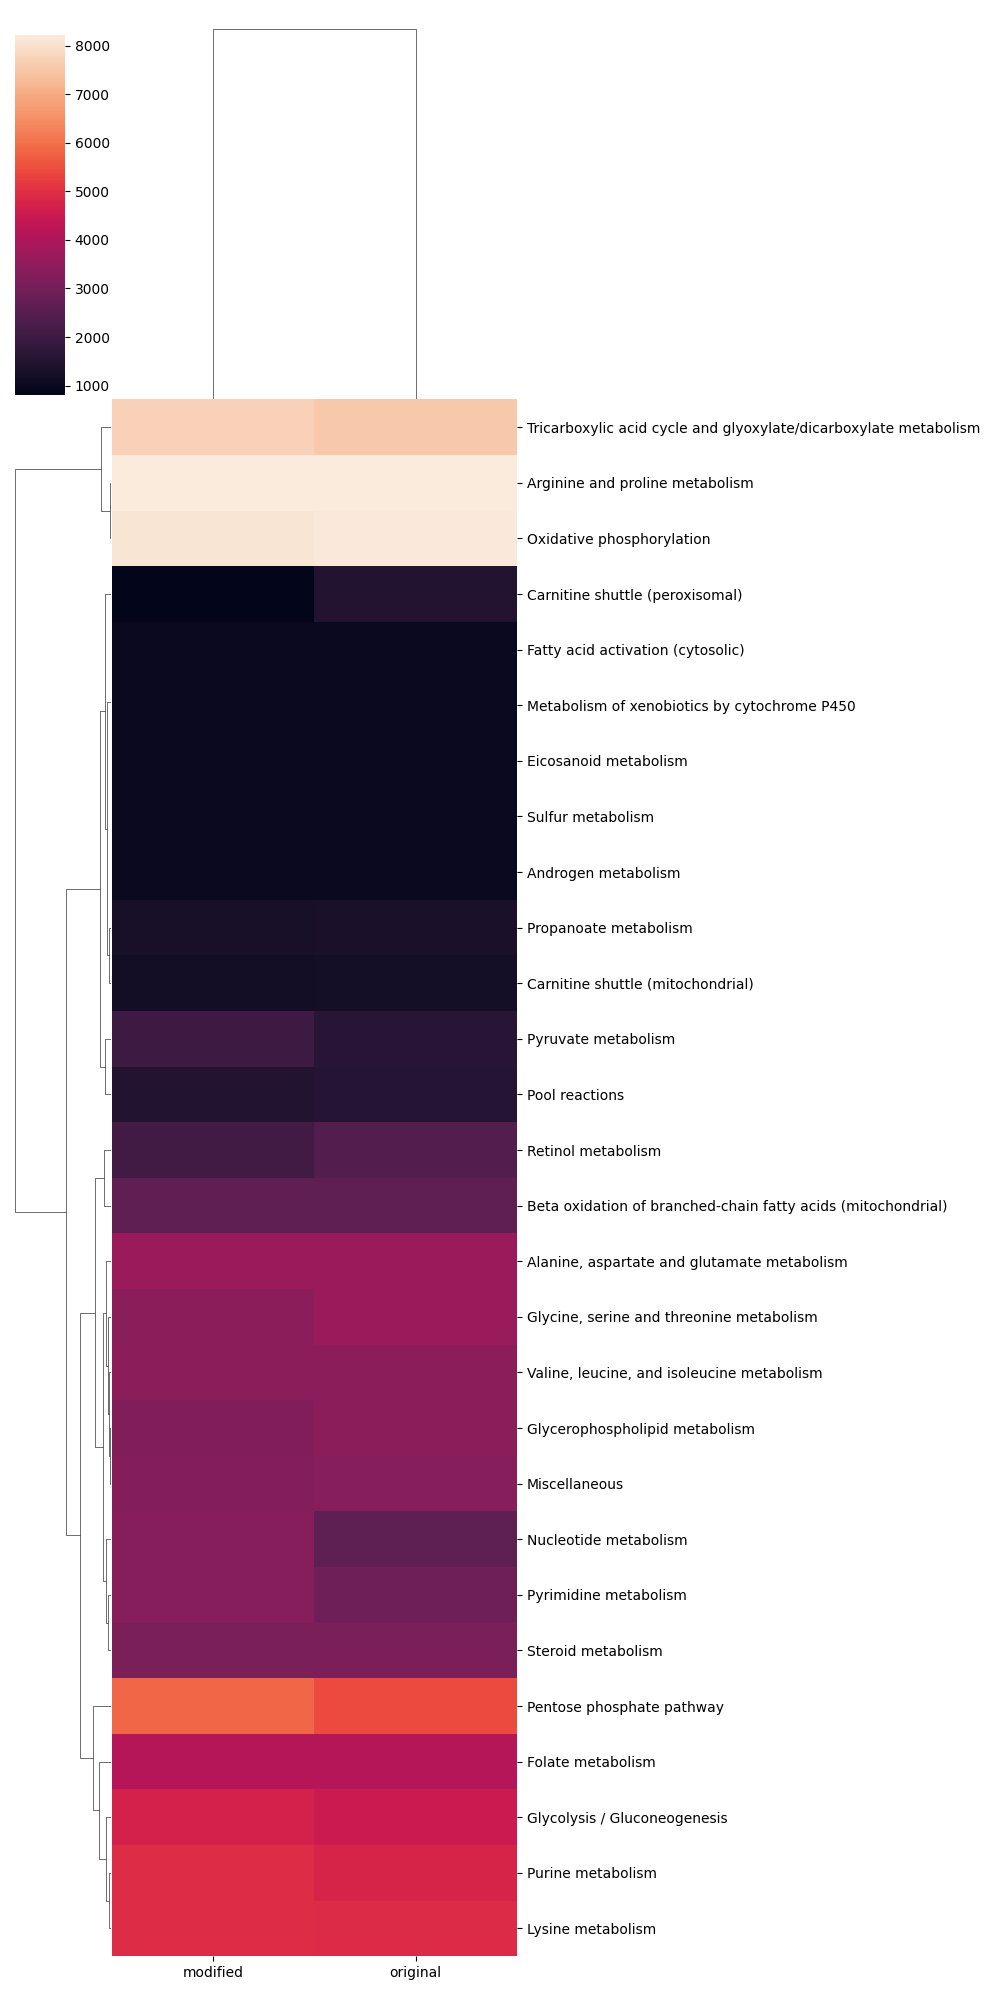

In [28]:
import seaborn as sns
import pandas as pd
with healthy as healthy1:
    healthy1.objective = "biomass_components"
    healthy1.optimize()
    subS_healthy = vu.get_subsystem_fluxes(vu.build_reaction_df(healthy1))
with healthy as healthy2:
    healthy2.objective = "original_biomass"
    sol = healthy2.optimize()
    subS_healthy2 = vu.get_subsystem_fluxes(vu.build_reaction_df(healthy2))
    
df_both = pd.concat([subS_healthy, subS_healthy2], axis = 1)
df_both.columns = ["modified", "original"]
df_both = df_both.loc[(df_both["modified"]>=1000.0) | (df_both["original"]>=1000.0)]
clustermap = sns.clustermap(df_both.fillna(0), figsize = (10,20))


In [23]:
vu.run_parcours("EX_m03161x", healthy)


[EX_m03161x] : Getting all related reactions and fluxes...
--> 1.0 glycogen

--> 1.0 m03161x
FLUX : 159.22487444355636 --- ID : EX_m03161x --- COMPARTMENT : {'C_x'}

SUBSYSTEM :  --- GENE NAME : EX_m03161x

---


1.0 glycogen --> 1.0 glycogen

1.0 m03161x --> 1.0 m03161s
FLUX : 159.22487444355636 --- ID : HMR_9729 --- COMPARTMENT : {'C_s', 'C_x'}

SUBSYSTEM : Exchange reactions --- GENE NAME : 

---


1.0 glycogen <-- 1.0 glycogen

1.0 m03161c <-- 1.0 m03161s
FLUX : -159.22487444355636 --- ID : HMR_9728 --- COMPARTMENT : {'C_s', 'C_c'}

SUBSYSTEM : Transport, extracellular --- GENE NAME : 

---


1.0 alanine + 1.0 arginine + 1.0 asparagine + 1.0 aspartate + 1.0 cholesterol + 1.0 cholesterol-ester pool + 1.0 CL pool + 1.0 cysteine + 1.0 DNA_C10H17O8PR2(C5H8O5PR)n + 1.0 DNA-5-methylcytosine_C10H16N3O7P(C5H8O5PR)n(C5H8O5PR)n + 1.0 glutamate + 1.0 glutamine + 1.0 glycine + 1.0 histidine + 1.0 isoleucine + 1.0 leucine + 1.0 lipid droplet_ + 1.0 lysine + 1.0 methionine + 1.0 phenylalanine +

{'EX_m03161x': 159.22487444355636,
 'HMR_9729': 159.22487444355636,
 'HMR_9728': -159.22487444355636,
 'biomass_components': 159.22487444355636,
 'HMR_4790': -0.25475979910969215,
 'HMR_4467': 0.25475979910969215,
 'HMR_4281': 108.4943553903897,
 'HMR_3007': -108.4943553903897,
 'HMR_6011': -1000.0,
 'HMR_6010': 1000.0,
 'HMR_6003': -1000.0,
 'HMR_6005': 1000.0,
 'HMR_8721': 1000.0,
 'HMR_8698': -543.428334010469,
 'HMR_6672': 543.428334010469,
 'HMR_6675': -543.428334010469,
 'HMR_6661': -543.428334010469,
 'HMR_6025': 45.688013764355816,
 'HMR_3899': -1000.0,
 'HMR_5067': 101.42821314714749,
 'HMR_5282': 1.2283693633737585,
 'HMR_5243': 0.17548133762482263,
 'HMR_5241': 0.17548133762482263,
 'HMR_9029': 0.17548133762482263,
 'EX_m03146x': 0.17548133762482263,
 'HMR_5255': 28.954420708095732,
 'HMR_0462': -28.95442070809832,
 'HMR_0031': 159.22487444355636,
 'HMR_0604': 159.22487444355636,
 'HMR_0667': 0.1273798995548451,
 'HMR_0673': 0.1273798995548451,
 'HMR_7591': 0.127379899554845

### Replace glycogen with glucose :

In [24]:
for metabolite in healthy.metabolites:
    if "glucose" in metabolite.name:
        print(metabolite.id, metabolite.name)

m00946c 4,6-dideoxy-4-oxo-dTDP-D-glucose
m01286c ADP-glucose
m01286s ADP-glucose
m01388c beta-D-glucose
m01389c beta-D-glucose-6-phosphate
m01751c dTDP-glucose
m01965c glucose
m01965g glucose
m01965l glucose
m01965r glucose
m01965s glucose
m01967c glucose-1-phosphate
m01968c glucose-6-phosphate
m01968r glucose-6-phosphate
m03108c UDP-glucose
m03108g UDP-glucose
m03108r UDP-glucose
m01965x glucose
m01286x ADP-glucose


In [35]:
healthy.reactions.get_by_id("biomass_components").add_metabolites({healthy.metabolites.get_by_id("m01965c") : 1.0})

In [34]:
print(healthy.reactions.biomass_components)

biomass_components: m01307c + m01365c + m01369c + m01370c + m01371c + m01450c + m01451r + m01589c + m01623c + m01628c + 2.0 m01965c + m01974c + m01975c + m01986c + m02034c + m02125c + m02184c + m02360c + m02392c + m02426c + m02471c + m02724c + m02733c + m02750c + m02770c + m02847c + m02896c + m02908c + m02993c + m03089c + m03101c + m03130c + m03135c --> m01285c + m02039x + m03161c + temp001x


In [36]:
healthy.objective = "biomass_components"
healthy.optimize()

,fluxes,reduced_costs
HMR_3905,0.000000,0.000000e+00
HMR_3907,0.000000,0.000000e+00
HMR_4097,0.000000,-1.352620e-01
HMR_4099,0.000000,-1.352620e-01
HMR_4108,0.000000,0.000000e+00
...,...,...
EX_m01451x,144.009056,0.000000e+00
HMR_9999,0.000000,0.000000e+00
EXR_m01965x,0.000000,-0.000000e+00
EX_temp001x,177.531390,0.000000e+00


In [37]:
vu.print_exchanges(healthy, "all")


##########
INTAKES :

EX_m03146x : 0           ub : 1000.0	---		metabolites : 	 id : m03146x --- metabolite name : VLDL remnant_ ; id : m03146x
EX_m02680x : 0           ub : 1000.0	---		metabolites : 	 id : m02680x --- metabolite name : pantothenate ; id : m02680x
EX_m00549x : 0           ub : 1000.0	---		metabolites : 	 id : m00549x --- metabolite name : 1-organyl-2-lyso-sn-glycero-3-phosphocholine ; id : m00549x
EX_m02961x : 0           ub : 1000.0	---		metabolites : 	 id : m02961x --- metabolite name : taurine ; id : m02961x
EX_m02389x : 3           ub : 1000.0	---		metabolites : 	 id : m02389x --- metabolite name : linolenate ; id : m02389x
EX_m02360x : 17          ub : 1000.0	---		metabolites : 	 id : m02360x --- metabolite name : leucine ; id : m02360x
EX_m02450x : 49          ub : 1000.0	---		metabolites : 	 id : m02450x --- metabolite name : maltose ; id : m02450x
EX_m01745x : 50          ub : 1000.0	---		metabolites : 	 id : m01745x --- metabolite name : D-tagatose ; id : m01

In [29]:
vu.run_parcours("EX_temp001x", healthy)


[EX_temp001x] : Getting all related reactions and fluxes...
1.0 biomass --> 

1.0 temp001x --> 
FLUX : 159.22487444355835 --- ID : EX_temp001x --- COMPARTMENT : {'C_x'}

SUBSYSTEM :  --- GENE NAME : Null

---


1.0 alanine + 1.0 arginine + 1.0 asparagine + 1.0 aspartate + 1.0 cholesterol + 1.0 cholesterol-ester pool + 1.0 CL pool + 1.0 cysteine + 1.0 DNA_C10H17O8PR2(C5H8O5PR)n + 1.0 DNA-5-methylcytosine_C10H16N3O7P(C5H8O5PR)n(C5H8O5PR)n + 1.0 glutamate + 1.0 glutamine + 1.0 glycine + 1.0 histidine + 1.0 isoleucine + 1.0 leucine + 1.0 lipid droplet_ + 1.0 lysine + 1.0 methionine + 1.0 phenylalanine + 1.0 phosphatidate-LD-TAG pool + 1.0 PI pool + 1.0 proline + 1.0 RNA_C10H18O13P2R2(C5H8O6PR)n + 1.0 serine + 1.0 SM pool + 1.0 threonine + 1.0 tryptophan + 1.0 tyrosine + 1.0 valine + 1.0 ATP + 1.0 CTP + 1.0 GTP + 1.0 UTP + 1.0 glucose --> 1.0 biomass + 1.0 H+ + 1.0 ADP

1.0 m01307c + 1.0 m01365c + 1.0 m01369c + 1.0 m01370c + 1.0 m01450c + 1.0 m01451r + 1.0 m01589c + 1.0 m01628c + 1.0 m0172

{'EX_temp001x': 159.22487444355835,
 'biomass_components': 159.22487444355835,
 'HMR_4790': -0.25475979910969215,
 'HMR_4467': 0.25475979910969215,
 'HMR_4281': 108.49435539039207,
 'HMR_3007': -108.49435539039207,
 'HMR_6011': -1000.0,
 'HMR_6010': 1000.0,
 'HMR_6003': -1000.0,
 'HMR_6005': 1000.0,
 'HMR_8721': 1000.0,
 'HMR_8698': -543.4283340104735,
 'HMR_6672': 543.4283340104735,
 'HMR_6675': -543.4283340104735,
 'HMR_6661': -543.4283340104735,
 'HMR_6025': 45.68801376434809,
 'HMR_3899': -1000.0,
 'HMR_5067': 101.42821314714931,
 'HMR_5282': 1.2283693633737807,
 'HMR_5243': 0.1754813376248258,
 'HMR_5241': 0.1754813376248258,
 'HMR_9029': 0.1754813376248258,
 'EX_m03146x': 0.1754813376248258,
 'HMR_5255': 28.954420708096254,
 'HMR_0462': -28.95442070809627,
 'HMR_0031': 159.22487444355835,
 'HMR_0604': 159.22487444355835,
 'HMR_0667': 0.1273798995548467,
 'HMR_0673': 0.1273798995548467,
 'HMR_7591': 0.1273798995548467,
 'HMR_7590': 0.1273798995548467,
 'HMR_7594': 0.12737989955484